# Weather Data: Study, Clean and Transform

This notebook will study, clean and transform the weather dataset **NOAA_CentralPark_Weather.csv** downloaded after requesting to the NOAA (National Centers for Environmental Information).

It containts weather information (including hourly precipitation values) from 2017, 2018 and 2019.

### 0. [Premilinary Works](#Premilinary-Works)
- [How big is the file](#How-big-is-the-file)<br>
- [Count lines](#Count-lines)<br>
- [Inspect first lines](#Inspect-first-lines)

### 2. [Study the data](#Study-the-data)
- ```.shape```:        check nº of rows and columns.
- ```list(b.columns)```: check white spaces in column names.
- [Select columns of interest](#Select-columns-of-interest)
- ```.info()```: check data types and spot nulls.
- [What to do with NaNs](#What-to-do-with-NaNs)
    - Fill ``NaN`` with ``0's``
    - Replace ``T`` values with ``0's``
- [Convert to right data type](#Convert-to-right-data-type)
    - Remove trailing 's' from Precipitation values
    - Convert data types
- [Manage Time data](#Manage-Time-data)
    - Set timestamp as index and convert to 1H Periods
    - Visualize time series
    - Group by 'hour' and sum Precipitation values
- [Rename columns](#Rename-columns)
    
### 3. [Everything put together and Export CSV](#Everything-put-together-and-Export-CSV)
- [Sanity check](#Sanity-check)

# Premilinary Works
<div style = "float:right"><a style="text-decoration:none" href = "#Weather-Data:-Study,-Clean-and-Transform">Up</a></div>

### How big is the file
<div style = "float:right"><a style="text-decoration:none" href = "#Weather-Data:-Study,-Clean-and-Transform">Up</a></div>

In [1]:
# navigate to the data folder
%cd ../data

/home/angelrps/git/MasterDataScience_FinalProject/data


In [2]:
# list the files in data folder
!ls -Rl

.:
total 3714704
-rwxrwxrwx 1 angelrps angelrps 1048588401 Mar 25 13:15 2017_Yellow_Taxi_Trip_Data.csv.bz2
-rwxrwxrwx 1 angelrps angelrps 1065918551 Jun 18 12:58 2018_Yellow_Taxi_Trip_Data.csv.bz2
-rwxrwxrwx 1 angelrps angelrps  835929368 Apr  2 18:02 2019_Yellow_Taxi_Trip_Data.csv.bz2
-rw-rw-rw- 1 angelrps angelrps   30849190 Jul 29 10:10 Data_Cleaned_2017_To_Model.csv
-rw-rw-rw- 1 angelrps angelrps   13400119 Jun 23 09:34 Data_Cleaned_To_Model.csv
-rw-rw-rw- 1 angelrps angelrps   26023472 Aug 11 10:48 Data_Taxis_2017_Cleaned.csv
-rw-rw-rw- 1 angelrps angelrps   23640868 Jul 22 14:12 Data_Taxis_2017_Cleaned_Simplified.csv
-rw-rw-rw- 1 angelrps angelrps       2911 Jul  8 20:24 Data_Taxis_2017_Cleaned_TEST.csv
-rw-rw-rw- 1 angelrps angelrps   25954811 Aug 11 14:37 Data_Taxis_2018_Cleaned.csv
-rw-rw-rw- 1 angelrps angelrps   25765239 Aug 11 17:25 Data_Taxis_2019_Cleaned.csv
-rw-rw-rw- 1 angelrps angelrps       8934 Aug 11 07:33 Data_Taxis_2019_Cleaned_TEST.csv
-rwxrwxrwx 1 angelrps angel

The CSV file is not very big:

    - NOAA_CentralPark_Weather.csv in 13843633 bytes (13,20 MB)

### Count lines
<div style = "float:right"><a style="text-decoration:none" href = "#Weather-Data:-Study,-Clean-and-Transform">Up</a></div>

In [3]:
# count number of lines lines
!wc -l ../data/NOAA_CentralPark_Weather.csv

# RESULT
# the file has 36036 lines

36036 ../data/NOAA_CentralPark_Weather.csv


### Inspect first lines
<div style = "float:right"><a style="text-decoration:none" href = "#Weather-Data:-Study,-Clean-and-Transform">Up</a></div>

- There is a header on the first line
- The separator is ```','```
- Column names and number are as expected, according to the **Local Climatological Data (LCD) Dataset Documentation** ``LCD_documentation.pdf`` that you can find in the ``./data`` folder

In [4]:
!head -5 ../data/NOAA_CentralPark_Weather.csv

"STATION","DATE","REPORT_TYPE","SOURCE","AWND","BackupDirection","BackupDistance","BackupDistanceUnit","BackupElements","BackupElevation","BackupElevationUnit","BackupEquipment","BackupLatitude","BackupLongitude","BackupName","CDSD","CLDD","DSNW","DailyAverageDewPointTemperature","DailyAverageDryBulbTemperature","DailyAverageRelativeHumidity","DailyAverageSeaLevelPressure","DailyAverageStationPressure","DailyAverageWetBulbTemperature","DailyAverageWindSpeed","DailyCoolingDegreeDays","DailyDepartureFromNormalAverageTemperature","DailyHeatingDegreeDays","DailyMaximumDryBulbTemperature","DailyMinimumDryBulbTemperature","DailyPeakWindDirection","DailyPeakWindSpeed","DailyPrecipitation","DailySnowDepth","DailySnowfall","DailySustainedWindDirection","DailySustainedWindSpeed","DailyWeather","HDSD","HTDD","HeavyFog","HourlyAltimeterSetting","HourlyDewPointTemperature","HourlyDryBulbTemperature","HourlyPrecipitation","HourlyPresentWeatherType","HourlyPressureChange","HourlyPressureTendency","Ho

In [5]:
# navigate back to the notebooks folder
%cd ../notebooks

/home/angelrps/git/MasterDataScience_FinalProject/notebooks


# Study the data
<div style = "float:right"><a style="text-decoration:none" href = "#Weather-Data:-Study,-Clean-and-Transform">Up</a></div>

My computer can handle 36036 lines so I will work with the complete dataset.

- ```.shape```:        check nº of rows and columns.
- ```list(b.columns)```: check white spaces in column names.
- [Select columns of interest](#Select-columns-of-interest)
- ```.info()```: check data types and spot nulls.
- [What to do with NaNs](#What-to-do-with-NaNs)
    - Fill ``NaN`` with ``0's``
    - Replace ``T`` values with ``0's``
- [Convert to right data type](#Convert-to-right-data-type)
    - Remove trailing 's' from Precipitation values
    - Convert data types

In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use("seaborn")                  # Set seaborn graphic style as default
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [7]:
# read csv
dfw = pd.read_csv('../data/NOAA_CentralPark_Weather.csv',
                  sep=',')
dfw.head()

/home/angelrps/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,25,26,27,28,30,31,33,42,43,48,53,71,75,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


STATION                 DATE REPORT_TYPE  SOURCE  AWND  \
0  72505394728  2017-01-01T00:51:00       FM-15       7   NaN   
1  72505394728  2017-01-01T01:51:00       FM-15       7   NaN   
2  72505394728  2017-01-01T02:51:00       FM-15       6   NaN   
3  72505394728  2017-01-01T03:51:00       FM-15       7   NaN   
4  72505394728  2017-01-01T04:51:00       FM-15       7   NaN   

   BackupDirection  BackupDistance  BackupDistanceUnit  BackupElements  \
0              NaN             NaN                 NaN             NaN   
1              NaN             NaN                 NaN             NaN   
2              NaN             NaN                 NaN             NaN   
3              NaN             NaN                 NaN             NaN   
4              NaN             NaN                 NaN             NaN   

   BackupElevation  BackupElevationUnit  BackupEquipment  BackupLatitude  \
0              NaN                  NaN              NaN             NaN   
1              NaN                  NaN              NaN             NaN   
2              NaN                  NaN              NaN             NaN   
3              NaN                  NaN              NaN             NaN   
4              NaN                  NaN              NaN             NaN   

   BackupLongitude  BackupName  CDSD  CLDD  DSNW  \
0              NaN         NaN   NaN   NaN   NaN   
1              NaN         NaN   NaN   NaN   NaN   
2              NaN         NaN   NaN   NaN   NaN   
3              NaN         NaN   NaN   NaN   NaN   
4              NaN         NaN   NaN   NaN   NaN   

   DailyAverageDewPointTemperature DailyAverageDryBulbTemperature  \
0                              NaN                            NaN   
1                              NaN                            NaN   
2                              NaN                            NaN   
3                              NaN                            NaN   
4                              NaN                            NaN   

   DailyAverageRelativeHumidity  DailyAverageSeaLevelPressure  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

   DailyAverageStationPressure  DailyAverageWetBulbTemperature  \
0                          NaN                             NaN   
1                          NaN                             NaN   
2                          NaN                             NaN   
3                          NaN                             NaN   
4                          NaN                             NaN   

   DailyAverageWindSpeed DailyCoolingDegreeDays  \
0                    NaN                    NaN   
1                    NaN                    NaN   
2                    NaN                    NaN   
3                    NaN                    NaN   
4                    NaN                    NaN   

  DailyDepartureFromNormalAverageTemperature DailyHeatingDegreeDays  \
0                                        NaN                    NaN   
1                                        NaN                    NaN   
2                                        NaN                    NaN   
3                                        NaN                    NaN   
4                                        NaN                    NaN   

  DailyMaximumDryBulbTemperature  DailyMinimumDryBulbTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

  DailyPeakWindDirection DailyPeakWindSpeed DailyPrecip

In [8]:
dfw.shape

(36035, 124)

There are too many columns (124), let's check one by one

In [9]:
list(dfw.columns)

['STATION',
 'DATE',
 'REPORT_TYPE',
 'SOURCE',
 'AWND',
 'BackupDirection',
 'BackupDistance',
 'BackupDistanceUnit',
 'BackupElements',
 'BackupElevation',
 'BackupElevationUnit',
 'BackupEquipment',
 'BackupLatitude',
 'BackupLongitude',
 'BackupName',
 'CDSD',
 'CLDD',
 'DSNW',
 'DailyAverageDewPointTemperature',
 'DailyAverageDryBulbTemperature',
 'DailyAverageRelativeHumidity',
 'DailyAverageSeaLevelPressure',
 'DailyAverageStationPressure',
 'DailyAverageWetBulbTemperature',
 'DailyAverageWindSpeed',
 'DailyCoolingDegreeDays',
 'DailyDepartureFromNormalAverageTemperature',
 'DailyHeatingDegreeDays',
 'DailyMaximumDryBulbTemperature',
 'DailyMinimumDryBulbTemperature',
 'DailyPeakWindDirection',
 'DailyPeakWindSpeed',
 'DailyPrecipitation',
 'DailySnowDepth',
 'DailySnowfall',
 'DailySustainedWindDirection',
 'DailySustainedWindSpeed',
 'DailyWeather',
 'HDSD',
 'HTDD',
 'HeavyFog',
 'HourlyAltimeterSetting',
 'HourlyDewPointTemperature',
 'HourlyDryBulbTemperature',
 'HourlyPrec

### Select columns of interest
<div style = "float:right"><a style="text-decoration:none" href = "#Weather-Data:-Study,-Clean-and-Transform">Up</a></div>

To carry on with the study I am just going to take the two columns I need:
- ``DATE``
- ``HourlyPrecipitation``

In [10]:
# 2. For now I am just going to take 2 columns: DATE and PRECIPITATION.
dfw = dfw[['DATE','HourlyPrecipitation']]
dfw.head()

DATE HourlyPrecipitation
0  2017-01-01T00:51:00                0.00
1  2017-01-01T01:51:00                   T
2  2017-01-01T02:51:00                0.00
3  2017-01-01T03:51:00                0.00
4  2017-01-01T04:51:00                0.00

Using ``.info()`` I can see nulls in ``HourlyPrecipitation``. Also I will need to convert ``DATE`` to **datetime64** and ``HourlyPrecipitation`` to **float**.

In [11]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36035 entries, 0 to 36034
Data columns (total 2 columns):
DATE                   36035 non-null object
HourlyPrecipitation    30099 non-null object
dtypes: object(2)
memory usage: 563.2+ KB


### What to do with NaNs
<div style = "float:right"><a style="text-decoration:none" href = "#Weather-Data:-Study,-Clean-and-Transform">Up</a></div>

There are **5936 NaNs** in ``HourlyPrecipitation`` (16% of rows). I will replace them with ``0`` as if there was no precipitation.
I think this is better than removing 16% of the rows.

Also "Trace" amounts of precipitation are indicated with a “T”. There are **2103 "T"** (6% of rows). I will also replace these values with ``0``.

In [12]:
# 3. What to do with NaNs
print('NaN VALUES: ')
print(dfw.isnull().sum())

tvalues = dfw[dfw['HourlyPrecipitation'] == 'T'].shape
print("'T' VALUES: ", tvalues)

display(dfw.tail())

NaN VALUES: 
DATE                      0
HourlyPrecipitation    5936
dtype: int64
'T' VALUES:  (2103, 2)


DATE HourlyPrecipitation
36030  2019-12-31T21:51:00                   T
36031  2019-12-31T22:51:00                   T
36032  2019-12-31T23:51:00                0.00
36033  2019-12-31T23:59:00                 NaN
36034  2019-12-31T23:59:00                 NaN

### Fill ``NaN`` with ``0's``
<div style = "float:right"><a style="text-decoration:none" href = "#Weather-Data:-Study,-Clean-and-Transform">Up</a></div>

In [13]:
dfw['HourlyPrecipitation'].fillna('0.00', inplace=True)
dfw.isnull().sum()

DATE                   0
HourlyPrecipitation    0
dtype: int64

### Replace ``T`` values with ``0's``
<div style = "float:right"><a style="text-decoration:none" href = "#Weather-Data:-Study,-Clean-and-Transform">Up</a></div>

In [14]:
dfw.loc[(dfw.HourlyPrecipitation == 'T'), 'HourlyPrecipitation'] = '0.00'
dfw.tail()

DATE HourlyPrecipitation
36030  2019-12-31T21:51:00                0.00
36031  2019-12-31T22:51:00                0.00
36032  2019-12-31T23:51:00                0.00
36033  2019-12-31T23:59:00                0.00
36034  2019-12-31T23:59:00                0.00

### Convert to right data type
<div style = "float:right"><a style="text-decoration:none" href = "#Weather-Data:-Study,-Clean-and-Transform">Up</a></div>

I will convert ``DATE`` to **datetime** and ``HourlyPrecipitation`` to **numeric**.

When trying to convert ``HourlyPrecipitation`` to **numeric** an error was thrown:<br>
```python
dfw['HourlyPrecipitation'] = pd.to_numeric(dfw['HourlyPrecipitation'])

ValueError: Unable to parse string "0.05s" at position 361
```

There are some trailing 's' that I need to strip from precipitation values before changing the type.

#### Remove trailing 's' from Precipitation values

In [15]:
# 5. Remove trailing 's' from some Precipitation values
dfw['HourlyPrecipitation'] = dfw['HourlyPrecipitation'].str.replace('s', '')

s = dfw.HourlyPrecipitation.str.contains('s')
dfw[s] # should be empty

Empty DataFrame
Columns: [DATE, HourlyPrecipitation]
Index: []

#### Convert data types

In [16]:
dfw['DATE'] = pd.to_datetime(dfw['DATE'])
dfw['HourlyPrecipitation'] = pd.to_numeric(dfw['HourlyPrecipitation'])
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36035 entries, 0 to 36034
Data columns (total 2 columns):
DATE                   36035 non-null datetime64[ns]
HourlyPrecipitation    36035 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 563.2 KB


### Manage Time data
<div style = "float:right"><a style="text-decoration:none" href = "#Weather-Data:-Study,-Clean-and-Transform">Up</a></div>

I have to convert the ``DATE`` into periods of one hour so they match how the taxis data is structured.

#### Set timestamp as index and convert to 1H Periods

In [17]:
# 7. Set timestamp as index
dfw.set_index('DATE', inplace=True)

# 8. Convert the DATE in PERIODS of 1 hour
dfw = dfw.to_period("H")
dfw.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 36035 entries, 2017-01-01 00:00 to 2019-12-31 23:00
Freq: H
Data columns (total 1 columns):
HourlyPrecipitation    36035 non-null float64
dtypes: float64(1)
memory usage: 563.0 KB


#### Visualize time series

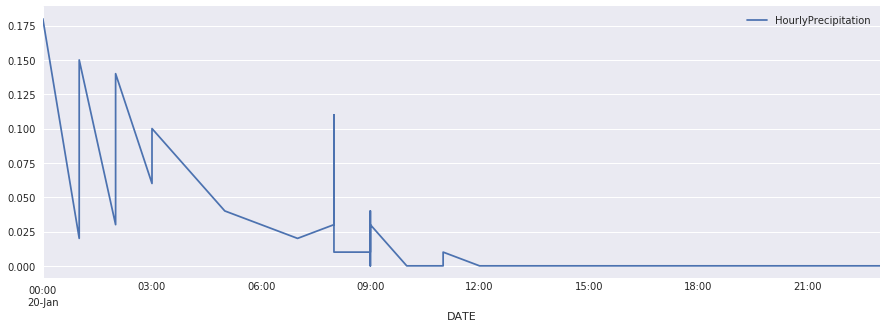

HourlyPrecipitation
DATE                                 
2019-01-20 08:00                 0.03
2019-01-20 08:00                 0.05
2019-01-20 08:00                 0.11
2019-01-20 08:00                 0.01

In [18]:
plt.rcParams["figure.figsize"] = (15, 5)
dfw['2019/01/20'].plot()
#dfw.plot()
plt.show()
dfw.loc['2019/01/20 08:00:00']

#### Groupby 'hour' and sum Precipitation values

As a consequence of converting to 1H periods, there seems to be multiple entries per hour so I will groupby 'hour' and sum Precipitation values

In [19]:
dfw = dfw.resample('H').sum()

The plot now looks good

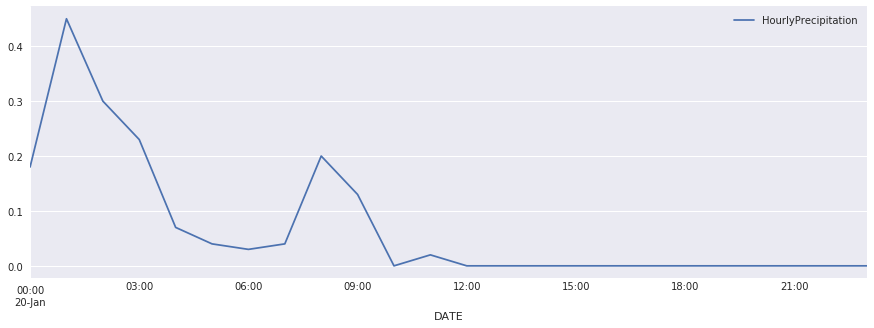

HourlyPrecipitation
DATE                                 
2019-12-31 19:00                 0.00
2019-12-31 20:00                 0.02
2019-12-31 21:00                 0.00
2019-12-31 22:00                 0.00
2019-12-31 23:00                 0.00

In [20]:
plt.rcParams["figure.figsize"] = (15, 5)  # default size of figure
dfw['2019/01/20'].plot()
#dfw.plot()
plt.show()

dfw.tail()

### Rename columns
<div style = "float:right"><a style="text-decoration:none" href = "#Weather-Data:-Study,-Clean-and-Transform">Up</a></div>

Before renaming I have to convert the ``DATE`` index back into a column.

In [21]:
# reset index
dfw.reset_index(level=0, inplace=True)

# rename columns
dfw = dfw.rename(columns={'DATE':'datetime','HourlyPrecipitation':'precipitation'})

dfw.head()

datetime  precipitation
0  2017-01-01 00:00            0.0
1  2017-01-01 01:00            0.0
2  2017-01-01 02:00            0.0
3  2017-01-01 03:00            0.0
4  2017-01-01 04:00            0.0

# Everything put together and Export CSV
<div style = "float:right"><a style="text-decoration:none" href = "#Weather-Data:-Study,-Clean-and-Transform">Up</a></div>

In [22]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# 1. Read csv
dfw = pd.read_csv('../data/NOAA_CentralPark_Weather.csv',
                  low_memory=False,
                  sep=',')
    
# 2. Select columns of interest: DATE and HourlyPrecipitation.
dfw = dfw[['DATE','HourlyPrecipitation']]

# 3. Fill NaN with 0.00
dfw['HourlyPrecipitation'].fillna('0.00', inplace=True)

# 4. Replace 'T' values with 0.00
dfw.loc[(dfw.HourlyPrecipitation == 'T'), 'HourlyPrecipitation'] = '0.00'

# 5. Remove trailing 's' from some Precipitation values
dfw['HourlyPrecipitation'] = dfw['HourlyPrecipitation'].str.replace('s', '')

# 6. Convert data types
dfw['DATE'] = pd.to_datetime(dfw['DATE'])
dfw['HourlyPrecipitation'] = pd.to_numeric(dfw['HourlyPrecipitation'])

# 7. Manage Time data
    # 7.1 Set timestamp as index
dfw.set_index('DATE', inplace=True)
    # 7.2. Convert the DATE in PERIODS of 1 hour
dfw = dfw.to_period("H")
    # 7.3 Groupby 'hour' and sum Precipitation values
dfw = dfw.resample('H').sum()
    # 7.4 Convert the 'DATE' index back into a column
dfw.reset_index(level=0, inplace=True)

# 8. Rename columns
dfw = dfw.rename(columns={'DATE':'datetime','HourlyPrecipitation':'precipitation'})

# 9. Save a csv that can be used afterwards
dfw.to_csv('../data/Data_Weather_Cleaned.csv', index = False, header=True)
dfw.head()

datetime  precipitation
0  2017-01-01 00:00            0.0
1  2017-01-01 01:00            0.0
2  2017-01-01 02:00            0.0
3  2017-01-01 03:00            0.0
4  2017-01-01 04:00            0.0

### Sanity check
<div style = "float:right"><a style="text-decoration:none" href = "#Weather-Data:-Study,-Clean-and-Transform">Up</a></div>

In [23]:
from datetime import datetime as dt

csvcheck = pd.read_csv('../data/Data_Weather_Cleaned.csv', sep=',',
                      parse_dates=['datetime'])

print('Year should be 2017, 2018 and 2019: ', csvcheck.datetime.dt.year.unique())
print('There should be 12 months:', csvcheck.datetime.dt.month.nunique())
print('There should be 31 days:', csvcheck.datetime.dt.day.nunique())
print('There should be 24 hours:', csvcheck.datetime.dt.hour.nunique())
print('There should be 52 weeks:', csvcheck.datetime.dt.week.nunique())

print('There should be 26280 hourly periods in 3 years: ',csvcheck.shape)
print(csvcheck.describe())
csvcheck.info()

Year should be 2017, 2018 and 2019:  [2017 2018 2019]
There should be 12 months: 12
There should be 31 days: 31
There should be 24 hours: 24
There should be 52 weeks: 52
There should be 26280 hourly periods in 3 years:  (26280, 2)
       precipitation
count   26280.000000
mean        0.014000
std         0.108437
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.600000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 2 columns):
datetime         26280 non-null datetime64[ns]
precipitation    26280 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 410.8 KB
